# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `happiness_score.csv`

In [132]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from scipy.stats import chi2_contingency
import os


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import functions
import sys
sys.path.insert(0, '../utils')

import functions_EDA as feda

### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

## EDA

### Load data and inspect raw structure: shape, columns, head/tail, nulls, data types, descriptive stats (.describe()).

In [3]:
df = pd.read_csv('../data/raw/happiness_score.csv')

In [4]:
df.shape

(312, 12)

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Overall rank', 'Country or region',
       'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0.1                      int64
Unnamed: 0                        int64
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
year                              int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,7.000000,312.000000,312.000000,311.000000,312.000000
mean,155.500000,77.500000,78.500000,5.391506,0.898298,1.211026,0.038571,0.423538,0.182926,0.111299,2018.500000
std,90.210864,45.104737,45.104737,1.114631,0.394592,0.300310,0.035213,0.156024,0.096739,0.095365,0.500803
min,0.000000,0.000000,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,77.750000,38.750000,39.750000,4.514250,0.609500,1.055750,0.005000,0.322500,0.108750,0.050000,2018.000000
50%,155.500000,77.500000,78.500000,5.379500,0.960000,1.265500,0.048000,0.449500,0.175500,0.082000,2018.500000
75%,233.250000,116.250000,117.250000,6.176000,1.219500,1.457500,0.066000,0.540250,0.245000,0.140500,2019.000000
max,311.000000,155.000000,156.000000,7.769000,2.096000,1.644000,0.080000,0.724000,0.598000,0.457000,2019.000000


In [8]:
df.head()


,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [9]:
df.tail()


,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
307,307,151,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,308,152,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,310,154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019
311,311,155,156,South Sudan,2.853,0.306,0.575,NaN,0.010,0.202,0.091,2019


In [10]:
df.isna().any()

Unnamed: 0.1                    False
Unnamed: 0                      False
Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy          True
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption        True
year                            False
dtype: bool

In [11]:
df.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
Overall rank                      0
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy         305
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
year                              0
dtype: int64

In [12]:
df.isnull().mean() * 100

Unnamed: 0.1                     0.000000
Unnamed: 0                       0.000000
Overall rank                     0.000000
Country or region                0.000000
Score                            0.000000
GDP per capita                   0.000000
Social support                   0.000000
Healthy life expectancy         97.756410
Freedom to make life choices     0.000000
Generosity                       0.000000
Perceptions of corruption        0.320513
year                             0.000000
dtype: float64

In [13]:
#Examples of countries/rows where data is incomplete.

df[df.isnull().any(axis=1)].head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


!! Healthy life expectancy has many NaNs.

### Standardize and clean column names (consistent naming).

In [15]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [16]:
df.columns


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [17]:
df.shape

(312, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       7 non-null      float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [19]:
df_cleaned = feda.clean_column_names(df)
df_cleaned

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019


### Review and correct data types (e.g., dates, categories, floats).

In [20]:
df_cleaned.dtypes

overall_rank                      int64
country_or_region                object
score                           float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object

In [21]:
df_cleaned.head(5)

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [22]:
df_cleaned['country_or_region'].value_counts()

country_or_region
Finland            2
Norway             2
Denmark            2
Iceland            2
Switzerland        2
                  ..
Sudan              1
North Macedonia    1
Gambia             1
Swaziland          1
Comoros            1
Name: count, Length: 160, dtype: int64

In [23]:

df_cleaned['country_or_region'] = df_cleaned['country_or_region'].astype('category')

In [24]:
df_cleaned.dtypes

overall_rank                       int64
country_or_region               category
score                            float64
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
year                               int64
dtype: object

In [26]:
print(df_cleaned['country_or_region'].cat.categories)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=160)


In [27]:
# Get value counts efficiently
df_cleaned['country_or_region'].value_counts()

country_or_region
Afghanistan        2
Albania            2
Algeria            2
Argentina          2
Australia          2
                  ..
Gambia             1
Macedonia          1
North Macedonia    1
Sudan              1
Swaziland          1
Name: count, Length: 160, dtype: int64

### Handle or drop NaNs before converting to non-null numeric types (like int).

In [28]:
df_cleaned.sample(15)

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
104,105,South Africa,4.724,0.940,1.410,NaN,0.516,0.103,0.056,2018
276,121,Kenya,4.509,0.512,0.983,NaN,0.431,0.372,0.053,2019
137,138,Ukraine,4.103,0.793,1.413,NaN,0.163,0.187,0.011,2018
52,53,Latvia,5.933,1.148,1.454,NaN,0.363,0.092,0.066,2018
305,150,Malawi,3.410,0.191,0.560,NaN,0.443,0.218,0.089,2019
165,10,Austria,7.246,1.376,1.475,NaN,0.532,0.244,0.226,2019
151,152,Yemen,3.355,0.442,1.073,NaN,0.244,0.083,0.064,2018
153,154,South Sudan,3.254,0.337,0.608,NaN,0.112,0.224,0.106,2018
202,47,Argentina,6.086,1.092,1.432,NaN,0.471,0.066,0.050,2019
166,11,Australia,7.228,1.372,1.548,NaN,0.557,0.332,0.290,2019


In [29]:
(df_cleaned.isnull().mean() * 100).sort_values(ascending=False)

healthy_life_expectancy         97.756410
perceptions_of_corruption        0.320513
country_or_region                0.000000
overall_rank                     0.000000
gdp_per_capita                   0.000000
score                            0.000000
social_support                   0.000000
freedom_to_make_life_choices     0.000000
generosity                       0.000000
year                             0.000000
dtype: float64

In [30]:
df_cleaned = df_cleaned.drop(columns=['healthy_life_expectancy'])

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   overall_rank                  312 non-null    int64   
 1   country_or_region             312 non-null    category
 2   score                         312 non-null    float64 
 3   gdp_per_capita                312 non-null    float64 
 4   social_support                312 non-null    float64 
 5   freedom_to_make_life_choices  312 non-null    float64 
 6   generosity                    312 non-null    float64 
 7   perceptions_of_corruption     311 non-null    float64 
 8   year                          312 non-null    int64   
dtypes: category(1), float64(6), int64(2)
memory usage: 25.6 KB


In [32]:
# Raw count of NaNs per column
print(df_cleaned.isnull().sum())

overall_rank                    0
country_or_region               0
score                           0
gdp_per_capita                  0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64


In [33]:
print((df_cleaned.isnull().mean() * 100).round(2))

overall_rank                    0.00
country_or_region               0.00
score                           0.00
gdp_per_capita                  0.00
social_support                  0.00
freedom_to_make_life_choices    0.00
generosity                      0.00
perceptions_of_corruption       0.32
year                            0.00
dtype: float64


In [34]:
df_cleaned[df_cleaned.isnull().any(axis=1)].head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018


Since it's just 1 row out of the entire dataset, the cleanest approach is to drop it

In [35]:
df_cleaned = df_cleaned.dropna(subset=['perceptions_of_corruption'])

In [36]:
print(df_cleaned.isnull().sum())

overall_rank                    0
country_or_region               0
score                           0
gdp_per_capita                  0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64


## Handle Missing Values

In [37]:
(df_cleaned.isnull().mean() * 100).sort_values(ascending=False)

overall_rank                    0.0
country_or_region               0.0
score                           0.0
gdp_per_capita                  0.0
social_support                  0.0
freedom_to_make_life_choices    0.0
generosity                      0.0
perceptions_of_corruption       0.0
year                            0.0
dtype: float64

Missingness = negligible

Missingness quantified (only 0.1% in perceptions_of_corruption)

The NaN was MCAR (just one missing entry, no dependency on other factors seen).

✅ Correct solution = drop the one row (which you already did). Dataset is now complete.

## Data Consistency & Duplicates

We don’t want the same (country, year) repeated unless justified.

In [38]:
# Check total duplicates (full row)
print("Total duplicate rows:", df_cleaned.duplicated().sum())

Total duplicate rows: 0


In [39]:
# Check duplicates by key (country, year)
print("Country-Year duplicates:", df_cleaned[['country_or_region', 'year']].duplicated().sum())

Country-Year duplicates: 0


In [40]:
# Check Impossible / Illogical Values

# Define expected ranges
checks = {
    'score': (0, 10),
    'gdp_per_capita': (0, 2),
    'social_support': (0, 2),
    'freedom_to_make_life_choices': (0, 1),
    'generosity': (0, 1),
    'perceptions_of_corruption': (0, 1)
}

# Spot out-of-range values
for col, (low, high) in checks.items():
    bad_vals = df_cleaned[(df_cleaned[col] < low) | (df_cleaned[col] > high)]
    if not bad_vals.empty:
        print(f"⚠️ Column {col} has values outside {low}–{high}:")
        print(bad_vals[[col, 'country_or_region', 'year']])

Duplicates: none found → every (country, year) is unique.

Consistency checks: all numeric values fall within expected ranges → no illogical or impossible values detected.

👉 This means the dataset is clean, non-redundant, and consistent.

## Descriptive Statistics

In [78]:
df_cleaned.describe()

,overall_rank,score,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,78.688103,5.387061,0.894447,1.212424,0.423987,0.182916,0.111299,2018.501608
std,45.054689,1.113653,0.389311,0.299774,0.156074,0.096895,0.095365,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,40.000000,4.512500,0.608000,1.057000,0.325500,0.108500,0.050000,2018.000000
50%,79.000000,5.373000,0.960000,1.266000,0.450000,0.175000,0.082000,2019.000000
75%,117.500000,6.173500,1.214500,1.458000,0.540500,0.245000,0.140500,2019.000000
max,156.000000,7.769000,1.684000,1.644000,0.724000,0.598000,0.457000,2019.000000


In [42]:
# Select only numeric columns before computing stats
num_df = df_cleaned.select_dtypes(include=['number'])

# Basic descriptive stats
summary_stats = num_df.describe().T  # transpose for readability

# Add median, skewness, kurtosis
summary_stats['median']   = num_df.median()
summary_stats['skewness'] = num_df.skew()
summary_stats['kurtosis'] = num_df.kurt()

print(summary_stats)

                              count         mean        std       min  \
overall_rank                  311.0    78.688103  45.054689     1.000   
score                         311.0     5.387061   1.113653     2.853   
gdp_per_capita                311.0     0.894447   0.389311     0.000   
social_support                311.0     1.212424   0.299774     0.000   
freedom_to_make_life_choices  311.0     0.423987   0.156074     0.000   
generosity                    311.0     0.182916   0.096895     0.000   
perceptions_of_corruption     311.0     0.111299   0.095365     0.000   
year                          311.0  2018.501608   0.500803  2018.000   

                                    25%       50%        75%       max  \
overall_rank                    40.0000    79.000   117.5000   156.000   
score                            4.5125     5.373     6.1735     7.769   
gdp_per_capita                   0.6080     0.960     1.2145     1.684   
social_support                   1.0570     1.

In [ ]:
for col in numeric_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

numeric_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()

print(numeric_cols)

['overall_rank', 'score', 'gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'year']


In [51]:
print("🔍 KEY INSIGHTS FROM THE STATISTICS:")
print("=" * 80)

# Analyze key patterns
for col in numeric_cols:
    if col in summary_stats.index:
        skew = summary_stats.loc[col, 'skewness']
        mean_val = summary_stats.loc[col, 'mean']
        median_val = summary_stats.loc[col, 'median']
        
        print(f"\n{col.upper()}:")
        print(f"  • Range: {summary_stats.loc[col, 'min']:.3f} to {summary_stats.loc[col, 'max']:.3f}")
        print(f"  • Mean: {mean_val:.3f}, Median: {median_val:.3f}")
        
        if abs(skew) < 0.5:
            print(f"  • Distribution: Fairly symmetric (skew: {skew:.3f})")
        elif skew > 0.5:
            print(f"  • Distribution: Right-skewed (skew: {skew:.3f}) - few high values")
        else:
            print(f"  • Distribution: Left-skewed (skew: {skew:.3f}) - few low values")

print(f"\n📈 Dataset shape: {df_cleaned.shape[0]} countries/observations, {df_cleaned.shape[1]} variables")
print(f"📅 Years covered: {df_cleaned['year'].min()} to {df_cleaned['year'].max()}")

🔍 KEY INSIGHTS FROM THE STATISTICS:

OVERALL_RANK:
  • Range: 1.000 to 156.000
  • Mean: 78.688, Median: 79.000
  • Distribution: Fairly symmetric (skew: -0.005)

SCORE:
  • Range: 2.853 to 7.769
  • Mean: 5.387, Median: 5.373
  • Distribution: Fairly symmetric (skew: 0.019)

GDP_PER_CAPITA:
  • Range: 0.000 to 1.684
  • Mean: 0.894, Median: 0.960
  • Distribution: Fairly symmetric (skew: -0.377)

SOCIAL_SUPPORT:
  • Range: 0.000 to 1.644
  • Mean: 1.212, Median: 1.266
  • Distribution: Left-skewed (skew: -1.116) - few low values

FREEDOM_TO_MAKE_LIFE_CHOICES:
  • Range: 0.000 to 0.724
  • Mean: 0.424, Median: 0.450
  • Distribution: Left-skewed (skew: -0.639) - few low values

GENEROSITY:
  • Range: 0.000 to 0.598
  • Mean: 0.183, Median: 0.175
  • Distribution: Right-skewed (skew: 0.803) - few high values

PERCEPTIONS_OF_CORRUPTION:
  • Range: 0.000 to 0.457
  • Mean: 0.111, Median: 0.082
  • Distribution: Right-skewed (skew: 1.658) - few high values

YEAR:
  • Range: 2018.000 to 201

In [ ]:
print("📊 COMPREHENSIVE DESCRIPTIVE STATISTICS")
print("=" * 80)

# 1. OVERALL SUMMARY STATISTICS (all years combined)
print("\n🌍 OVERALL SUMMARY (2018-2019 Combined)")
print("-" * 50)

summary_stats = df_cleaned[numeric_cols].describe().T
summary_stats['median'] = df_cleaned[numeric_cols].median()
summary_stats['skewness'] = df_cleaned[numeric_cols].skew()
summary_stats['kurtosis'] = df_cleaned[numeric_cols].kurt()

# Reorder columns
column_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
summary_stats = summary_stats[column_order]
print(summary_stats.round(3))

# 2. YEAR-BY-YEAR COMPARISON
print("\n\n📅 YEAR-BY-YEAR COMPARISON")
print("-" * 50)

# Exclude 'year' from the groupby analysis
analysis_cols = [col for col in numeric_cols if col != 'year']
# this variable will be used multiple times below to generate plots and stats!!

# Create comprehensive yearly statistics
yearly_stats = {}
for year in [2018, 2019]:
    year_data = df_cleaned[df_cleaned['year'] == year][analysis_cols]
    yearly_stats[year] = {
        'count': year_data.count(),
        'mean': year_data.mean(),
        'median': year_data.median(),
        'std': year_data.std(),
        'min': year_data.min(),
        'max': year_data.max(),
        'skewness': year_data.skew(),
        'kurtosis': year_data.kurt()
    }

# Display yearly comparison in a nice format
print("MEAN VALUES BY YEAR:")
mean_comparison = pd.DataFrame({
    '2018': yearly_stats[2018]['mean'],
    '2019': yearly_stats[2019]['mean']
}).round(3)
print(mean_comparison)

print("\nMEDIAN VALUES BY YEAR:")
median_comparison = pd.DataFrame({
    '2018': yearly_stats[2018]['median'],
    '2019': yearly_stats[2019]['median']
}).round(3)
print(median_comparison)

print("\nSTANDARD DEVIATION BY YEAR:")
std_comparison = pd.DataFrame({
    '2018': yearly_stats[2018]['std'],
    '2019': yearly_stats[2019]['std']
}).round(3)
print(std_comparison)

# 3. KEY CHANGES BETWEEN YEARS
print("\n\n🔍 KEY CHANGES FROM 2018 TO 2019")
print("-" * 50)

# Calculate mean differences
mean_2018 = yearly_stats[2018]['mean']
mean_2019 = yearly_stats[2019]['mean']
changes = mean_2019 - mean_2018

print("Mean Changes (2019 - 2018):")
for col in analysis_cols:
    change = changes[col]
    direction = "↑" if change > 0 else "↓" if change < 0 else "→"
    pct_change = (change / mean_2018[col]) * 100 if mean_2018[col] != 0 else 0
    print(f"  {col}: {change:+.4f} {direction} ({pct_change:+.2f}%)")

# 4. SAMPLE SIZES BY YEAR
print(f"\n📈 Sample sizes:")
year_counts = df_cleaned['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"  {year}: {count} countries")

print(f"\nTotal observations: {len(df_cleaned)}")
print(f"Unique countries: {df_cleaned['country_or_region'].nunique()}")

# 5. MOST SIGNIFICANT CHANGES
print("\n🎯 MOST SIGNIFICANT CHANGES (absolute value):")
abs_changes = changes.abs().sort_values(ascending=False)
for col in abs_changes.index[:5]:  # Top 5 changes
    change = changes[col]
    direction = "↑" if change > 0 else "↓"
    print(f"  {col}: {change:+.4f} {direction}")

# 6. INTERPRETATION
print("\n📝 KEY INSIGHTS:")
print("-" * 30)
if changes['score'] > 0:
    print(f"✅ Global happiness INCREASED by {changes['score']:.4f} points from 2018 to 2019")
else:
    print(f"❌ Global happiness DECREASED by {abs(changes['score']):.4f} points from 2018 to 2019")

# Check which factors changed most
top_positive = changes[changes > 0].nlargest(2)
top_negative = changes[changes < 0].nsmallest(2)

if not top_positive.empty:
    print(f"📈 Biggest improvements: {', '.join(top_positive.index)}")
if not top_negative.empty:
    print(f"📉 Biggest declines: {', '.join(top_negative.index)}")

📊 COMPREHENSIVE DESCRIPTIVE STATISTICS

🌍 OVERALL SUMMARY (2018-2019 Combined)
--------------------------------------------------
                              count      mean    median     std       min  \
overall_rank                  311.0    78.688    79.000  45.055     1.000   
score                         311.0     5.387     5.373   1.114     2.853   
gdp_per_capita                311.0     0.894     0.960   0.389     0.000   
social_support                311.0     1.212     1.266   0.300     0.000   
freedom_to_make_life_choices  311.0     0.424     0.450   0.156     0.000   
generosity                    311.0     0.183     0.175   0.097     0.000   
perceptions_of_corruption     311.0     0.111     0.082   0.095     0.000   
year                          311.0  2018.502  2019.000   0.501  2018.000   

                                   25%       50%       75%       max  \
overall_rank                    40.000    79.000   117.500   156.000   
score                           

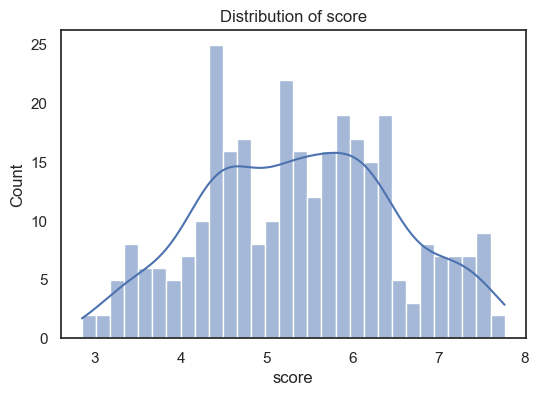

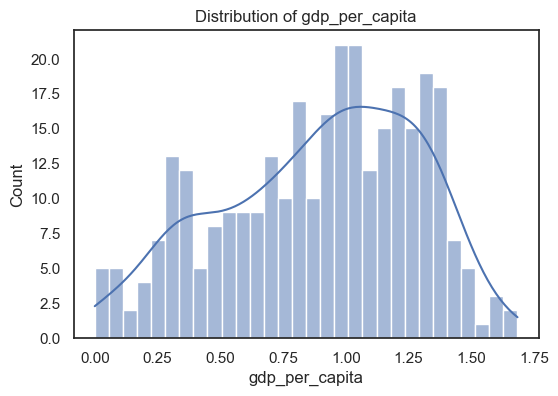

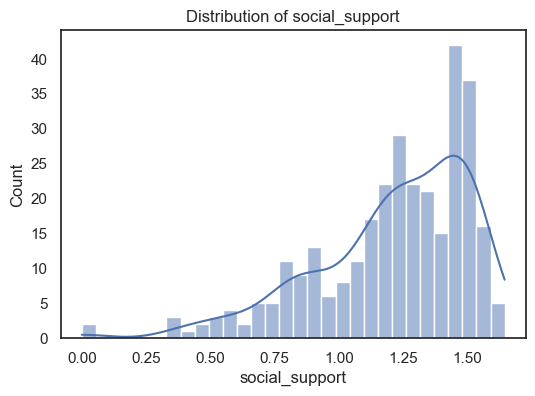

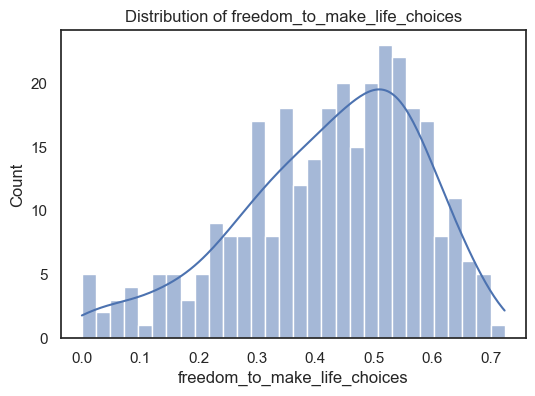

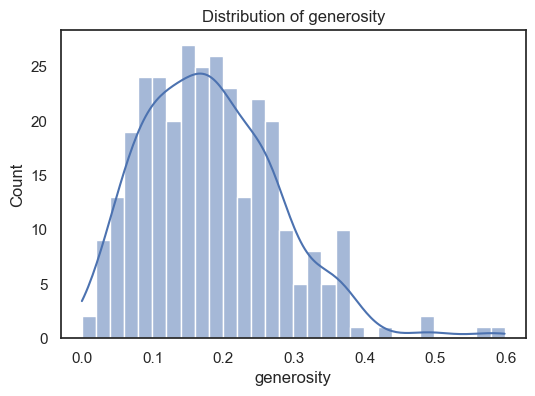

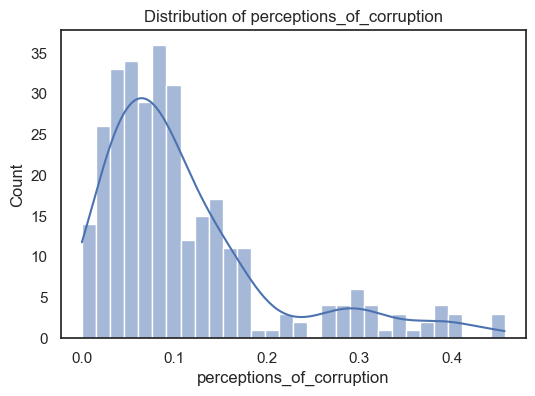

In [158]:
for col in analysis_cols:

    plt.figure(figsize=(6,4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    # Save the plot
    plt.savefig(f'../visualizations/univariate_plots/histograms/dist_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# For reproductibility · overall summary
summary_stats.to_csv("../data/processed/descriptive_stats.csv")

In [58]:
# Yearly comparison
mean_comparison.to_csv("../data/processed/yearly_mean_comparison.csv")

In [59]:
# Changes summary
changes_df = pd.DataFrame({
    'Variable': changes.index,
    'Change_2019_minus_2018': changes.values,
    'Percent_Change': [(changes[col] / mean_2018[col]) * 100 if mean_2018[col] != 0 else 0 for col in changes.index]
}).round(4)
changes_df.to_csv("../data/processed/year_over_year_changes.csv", index=False)

## Outlier Detection

In [94]:
#Outliers detection using IQR method
outliers = {}
for col in analysis_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Store outlier rows
    outliers[col] = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {outliers[col].shape[0]} outliers")

score: 0 outliers
gdp_per_capita: 0 outliers
social_support: 7 outliers
freedom_to_make_life_choices: 2 outliers
generosity: 4 outliers
perceptions_of_corruption: 31 outliers


In [92]:
#Percentiles
for col in analysis_cols:
    low, high = df_cleaned[col].quantile([0.01, 0.99])
    extremes = df_cleaned[(df_cleaned[col] < low) | (df_cleaned[col] > high)]
    print(f"{col}: {extremes.shape[0]} extreme values (below 1st or above 99th percentile)")

score: 8 extreme values (below 1st or above 99th percentile)
gdp_per_capita: 8 extreme values (below 1st or above 99th percentile)
social_support: 8 extreme values (below 1st or above 99th percentile)
freedom_to_make_life_choices: 8 extreme values (below 1st or above 99th percentile)
generosity: 7 extreme values (below 1st or above 99th percentile)
perceptions_of_corruption: 8 extreme values (below 1st or above 99th percentile)


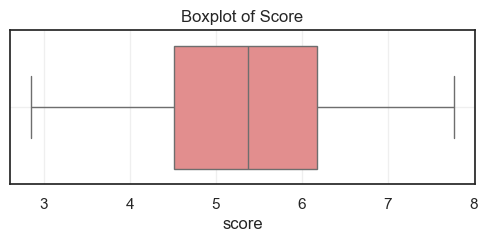

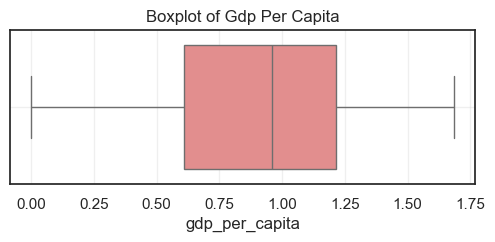

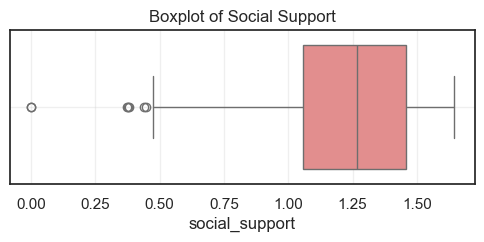

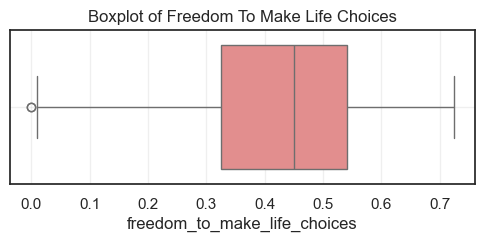

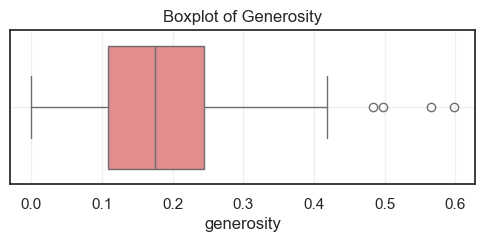

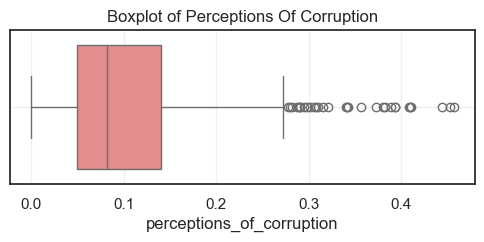

In [167]:
#Boxplots univariate

os.makedirs('../visualizations/univariate_plots/boxplots', exist_ok=True)

for col in analysis_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df_cleaned[col], color='lightcoral')
    plt.title(f"Boxplot of {col.replace('_', ' ').title()}")
    plt.grid(True, alpha=0.3)
    
    # Guardar antes de mostrar
    plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

### Outlier Investigation

Outliers were systematically detected using IQR and percentile methods.
- For **Happiness Score**, Nordic countries (Finland, Norway, Denmark) emerge as positive outliers, while conflict nations (Afghanistan, South Sudan) are negative outliers.  
- For **GDP per capita**, oil-rich microstates (Qatar, UAE) have extreme values but are not proportionally happy → disproving a simple GDP↔Happiness link.  
- **Costa Rica** is a remarkable positive outlier: relatively low GDP but disproportionately high happiness score, driven by social support and lifestyle.  
- **Generosity** shows cultural outliers such as Myanmar with very high scores driven by religious donation traditions.  
- **Corruption perception** highlights Scandinavian countries (low) vs fragile states (high).

These outliers illustrate the central narrative of *Unequal Happiness*: wealth explains part of happiness, but social, cultural, and governance factors create notable exceptions.

In [96]:
outlier_records = []

for col in analysis_cols:
    # --- Método IQR ---
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    
    iqr_outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    
    for _, row in iqr_outliers.iterrows():
        outlier_records.append({
            "variable": col,
            "country": row["country_or_region"],
            "value": row[col],
            "method": "IQR"
        })
    
    # --- Percentiles method (1% y 99%) ---
    p01 = df_cleaned[col].quantile(0.01)
    p99 = df_cleaned[col].quantile(0.99)
    
    perc_outliers = df_cleaned[(df_cleaned[col] < p01) | (df_cleaned[col] > p99)]
    
    for _, row in perc_outliers.iterrows():
        outlier_records.append({
            "variable": col,
            "country": row["country_or_region"],
            "value": row[col],
            "method": "Percentile"
        })

outlier_report = pd.DataFrame(outlier_records)

outlier_report = outlier_report.sort_values(by=["variable", "method", "value"]).reset_index(drop=True)

outlier_report.to_csv("../data/processed/outlier_report.csv", index=False)

outlier_report.head(20)

,variable,country,value,method
0,freedom_to_make_life_choices,Angola,0.000,IQR
1,freedom_to_make_life_choices,Afghanistan,0.000,IQR
2,freedom_to_make_life_choices,Angola,0.000,Percentile
3,freedom_to_make_life_choices,Afghanistan,0.000,Percentile
4,freedom_to_make_life_choices,South Sudan,0.010,Percentile
5,freedom_to_make_life_choices,Syria,0.013,Percentile
6,freedom_to_make_life_choices,Denmark,0.683,Percentile
7,freedom_to_make_life_choices,Norway,0.686,Percentile
8,freedom_to_make_life_choices,Cambodia,0.696,Percentile
9,freedom_to_make_life_choices,Uzbekistan,0.724,Percentile


## Feature Shape & Distribution

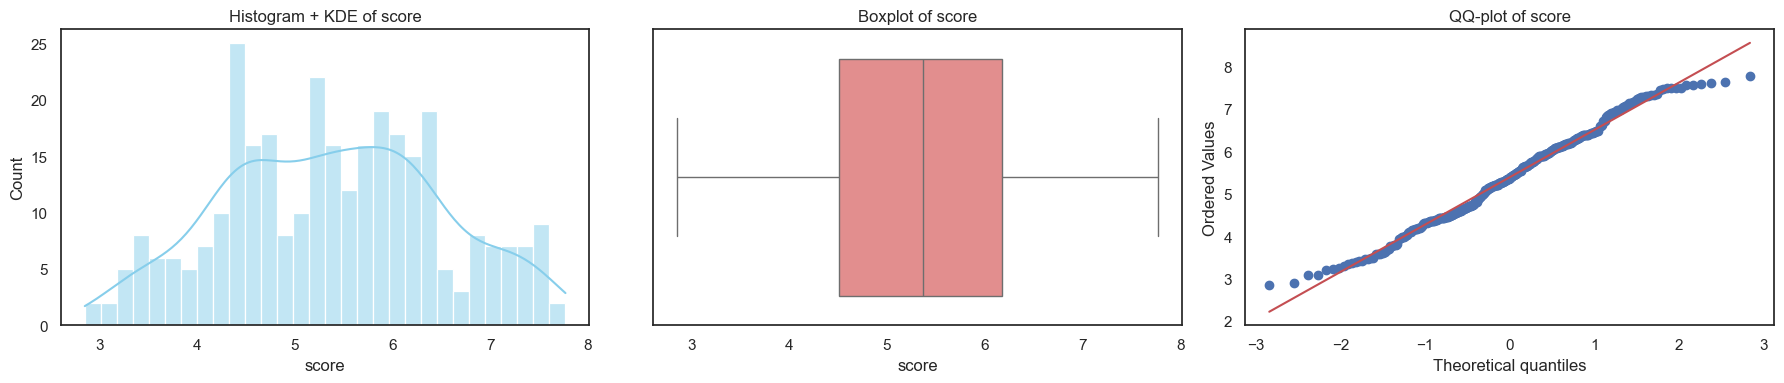

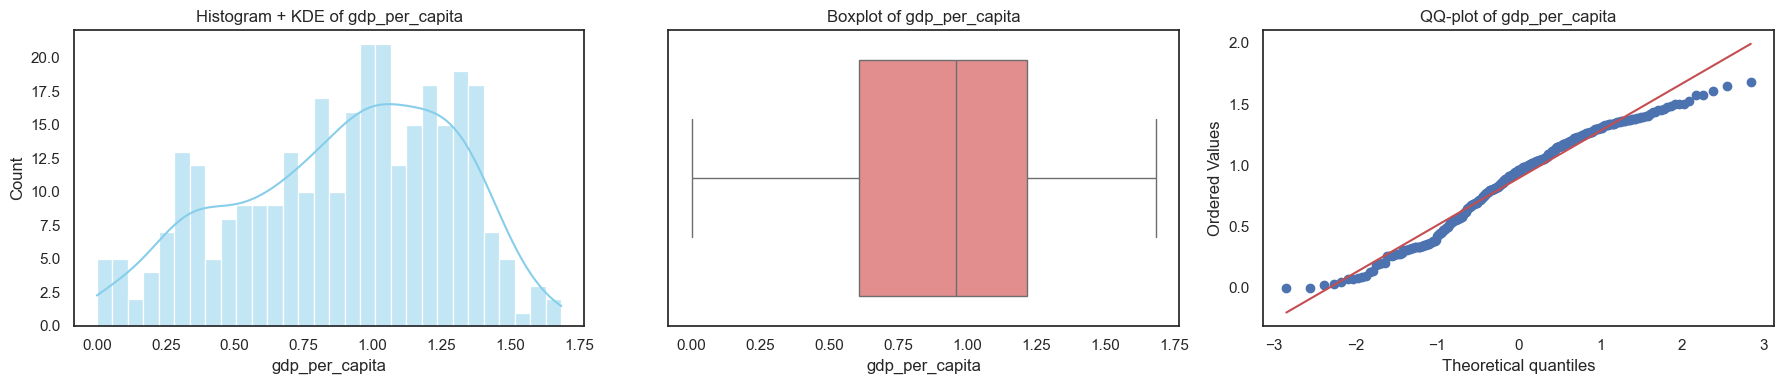

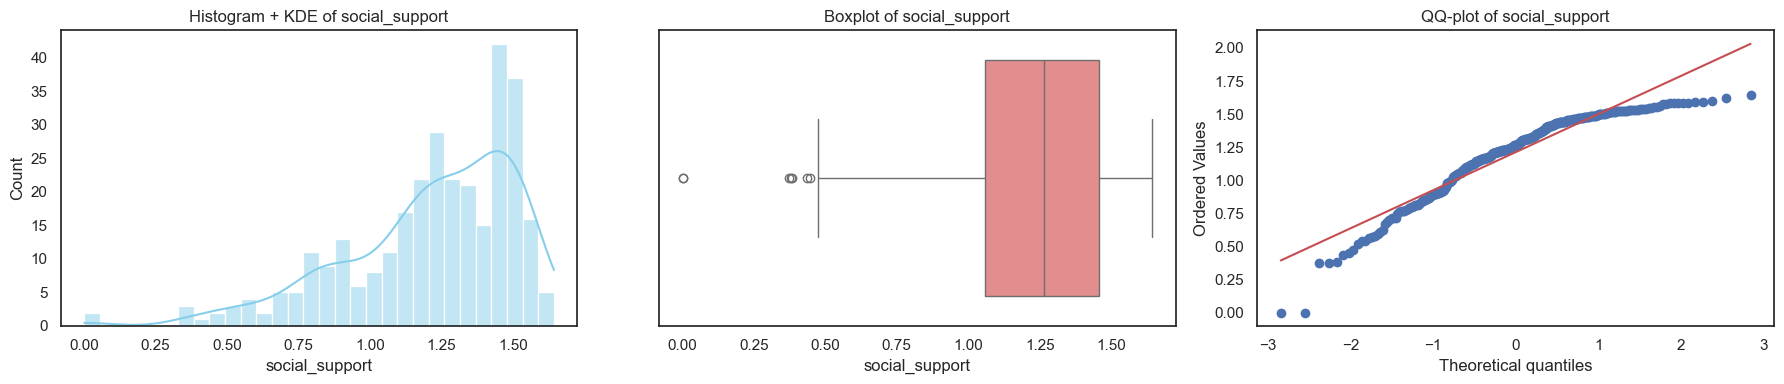

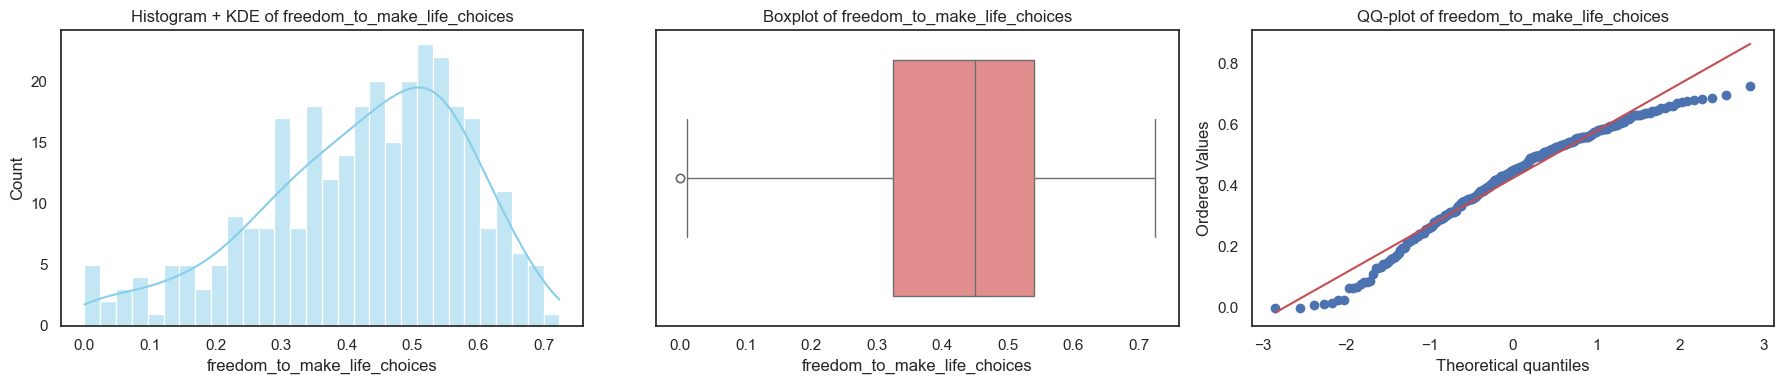

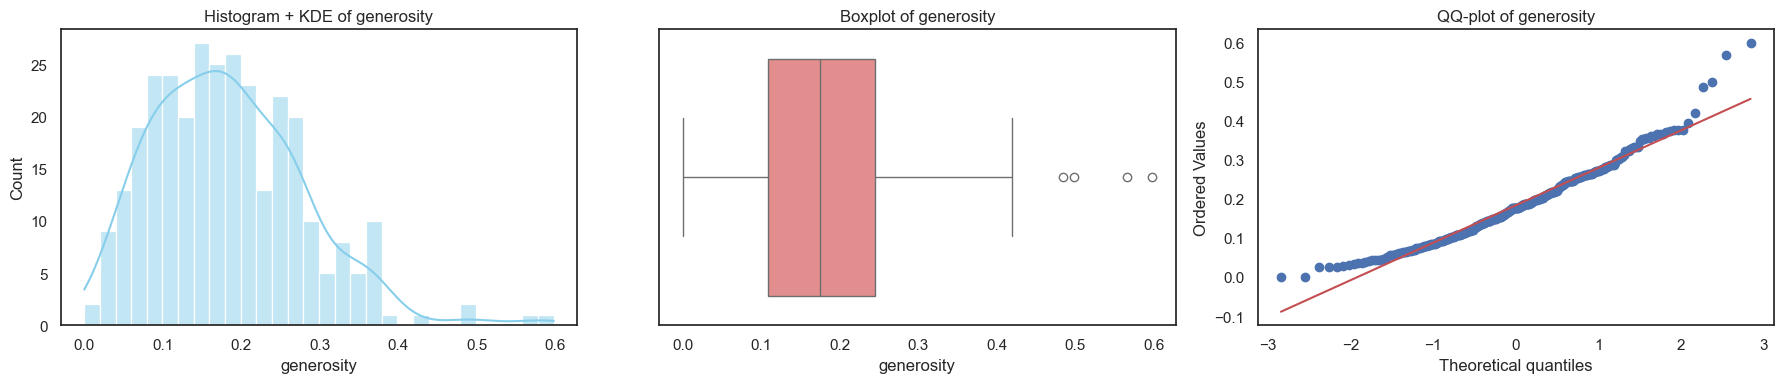

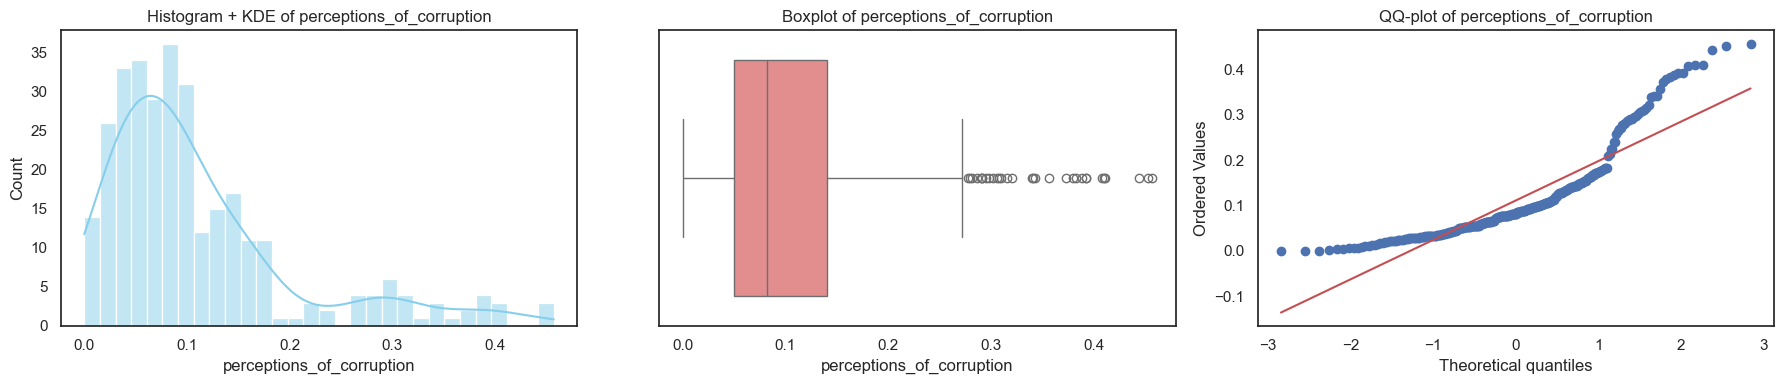

In [163]:
os.makedirs('../visualizations/multivariate_plots/feature_distributions', exist_ok=True)

for col in analysis_cols:

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Histograma + KDE
    sns.histplot(df_cleaned[col], kde=True, bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram + KDE of {col}')
    
    # Boxplot
    sns.boxplot(x=df_cleaned[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}')
    
    # QQ-Plot para ver ajuste a Normal
    stats.probplot(df_cleaned[col], dist="norm", plot=axes[2])
    axes[2].set_title(f'QQ-plot of {col}')
    
    plt.tight_layout()
    plt.savefig(f'../visualizations/multivariate_plots/feature_distributions/distribution_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

### Feature Shape & Distribution

- **Happiness Score:** Approximately normal distribution, range 2.8–7.7, with most countries clustered around 5–6.  
- **GDP per capita:** Highly right-skewed → most countries are relatively poor compared to a few extremely wealthy ones.  
- **Social support:** Compact distribution, most countries between 1.0–1.5, with a few low outliers.  
- **Freedom to make life choices:** Left-skewed, with countries that enjoy high freedom appearing as positive outliers.  
- **Generosity:** Left-skewed distribution, with some countries showing very high values (e.g., Myanmar).  
- **Perceptions of corruption:** Concentrated at low values → most countries perceive high levels of corruption, while a few countries like the Nordics stand out as low outliers.

### Skewness

In [109]:
df_cleaned[analysis_cols].skew()

score                           0.018939
gdp_per_capita                 -0.376950
social_support                 -1.115888
freedom_to_make_life_choices   -0.639369
generosity                      0.802667
perceptions_of_corruption       1.657917
dtype: float64

Score ≈ 0.02 → ~symmetric

GDP per capita ≈ −0.38 → mild left skew, but histogram shows heavy right tail (driven by few very rich countries)

Social support ≈ −1.11 → strong left skew (most high, a few very low)

Freedom to make life choices ≈ −0.64 → moderate left skew

Generosity ≈ +0.80 → moderate right skew

Perceptions of corruption ≈ +1.65 → strong right skew

In [112]:
for col in analysis_cols:
    data = df_cleaned[col].dropna()
    kde = gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 200)
    ys = kde(xs)
    peaks, _ = find_peaks(ys, prominence=0.01)  # detect KDE peaks
    
    print(f"{col}: {len(peaks)} modes detected")

score: 1 modes detected
gdp_per_capita: 1 modes detected
social_support: 1 modes detected
freedom_to_make_life_choices: 1 modes detected
generosity: 1 modes detected
perceptions_of_corruption: 2 modes detected


Score: 1 mode → unimodal, approximately normal.

GDP per capita: 1 mode → unimodal with heavy right tail.

Social support: 1 mode → unimodal, left skew.

Freedom to make life choices: 1 mode → unimodal, modest left skew.

Generosity: 1 mode → unimodal, moderate right skew.

Perceptions of corruption: 2 modes → bimodal distribution 🔥

### Multimodality & Skewness Findings

- **Happiness Score:** Unimodal and symmetric, with mild spread around the mean.  
- **GDP per capita:** Unimodal, strongly right-skewed — most countries clustered around low-to-mid GDP levels with a long tail of very wealthy nations.  
- **Social support:** Unimodal, left-skewed — most countries report high levels of social support, few with very weak support.  
- **Freedom to make life choices:** Unimodal, moderately left-skewed — a concentration of countries in the middle, with a few enjoying very high levels of freedom.  
- **Generosity:** Unimodal, moderately right-skewed — a few countries exhibit exceptionally high generosity.  
- **Perceptions of corruption:** **Bimodal** — most countries perceive high corruption, while a distinct cluster (Nordics, New Zealand, etc.) perceive very low corruption.

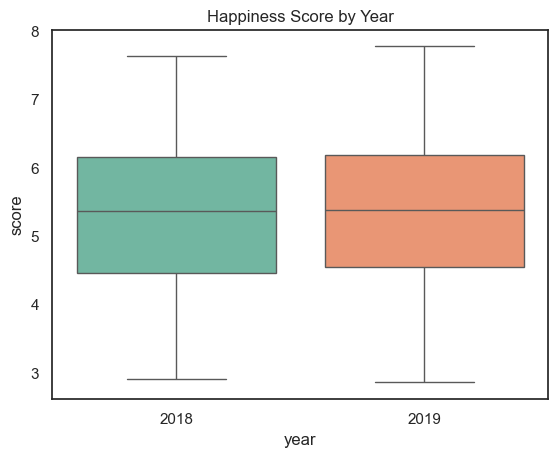

In [168]:
#Happiness Score by Year:

os.makedirs('../visualizations/univariate_plots/boxplots/by-year', exist_ok=True)

sns.boxplot(x='year', y='score', data=df_cleaned, palette="Set2")
plt.title("Happiness Score by Year")

plt.savefig(f'../visualizations/univariate_plots/boxplots/by-year/boxplot_{col}.png', dpi=300, bbox_inches='tight')
plt.show()

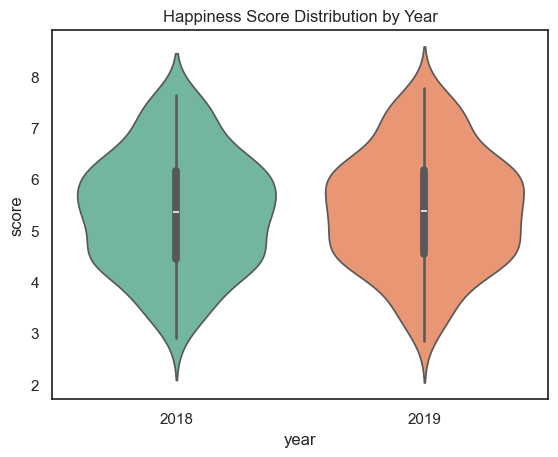

In [170]:
#Compare happiness across 2018 vs 2019:
out_dir = "../visualizations/univariate_plots/violin_plots/by_year"
os.makedirs(out_dir, exist_ok=True)

sns.violinplot(x='year', y='score', data=df_cleaned, palette="Set2", inner="box")
plt.title("Happiness Score Distribution by Year")

filepath = f"{out_dir}/violin_{col}_by_year-bis.png"
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

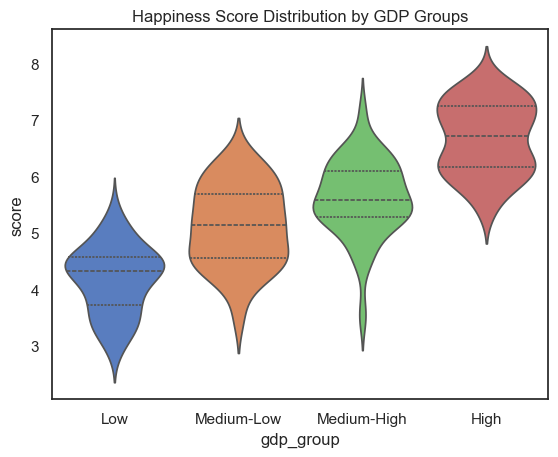

In [121]:
#group countries into income quartiles and visualize GDP ↔ Happiness distribution.

df_cleaned['gdp_group'] = pd.qcut(df_cleaned['gdp_per_capita'], 4, labels=['Low','Medium-Low','Medium-High','High'])

sns.violinplot(x='gdp_group', y='score', data=df_cleaned, palette="muted", inner="quartile")
plt.title("Happiness Score Distribution by GDP Groups")
plt.show()

### Violin Plots
Violin plots were used in addition to histograms and boxplots to show both **summary stats** and **distribution shapes** at once.  
- Happiness distributions across years (2018 vs 2019) appear similar, with slightly higher median in 2019.  
- GDP quartiles show wider happiness variability in lower-income countries, while high-income nations are clustered tightly.  
- Generosity and corruption perception distributions confirm skewed patterns, with long tails and small groups of outliers.


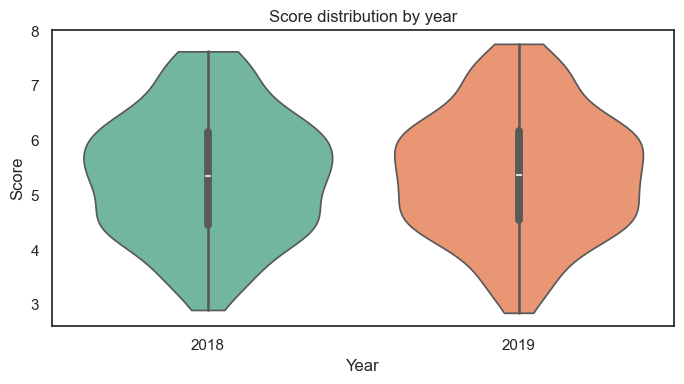

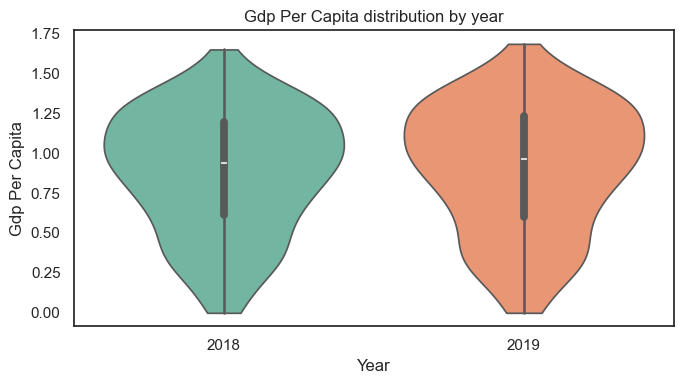

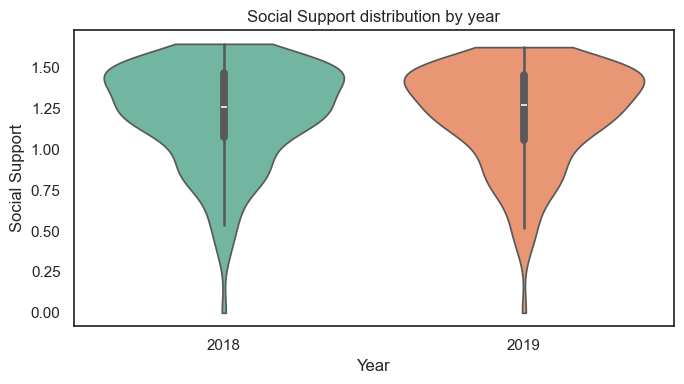

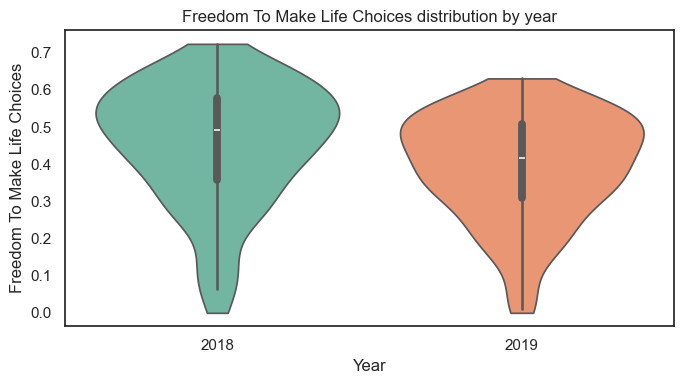

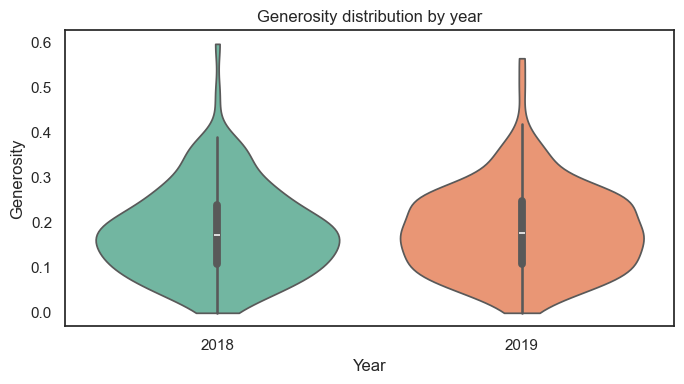

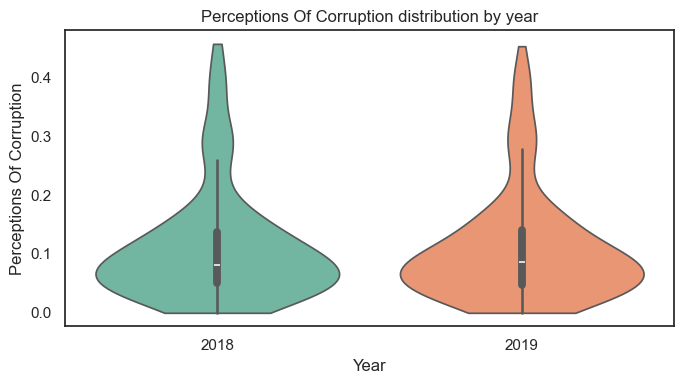

In [172]:
# Ensure year is treated as categorical for clean x-axis labels
df_cleaned['year'] = df_cleaned['year'].astype(int)

# Directory for outputs
out_dir = "../visualizations/univariate_plots/violin_plots/by_year"
os.makedirs(out_dir, exist_ok=True)

# Order years if present
year_order = sorted(df_cleaned['year'].unique().tolist())

for col in analysis_cols:  # analysis_cols excludes 'year' and 'overall_rank'
    plt.figure(figsize=(7, 4))
    sns.violinplot(
        data=df_cleaned,
        x='year',
        y=col,
        order=year_order,
        inner='box',
        cut=0,
        scale='width',
        palette='Set2'
    )
    plt.title(f"{col.replace('_',' ').title()} distribution by year")
    plt.xlabel("Year")
    plt.ylabel(col.replace('_',' ').title())
    plt.tight_layout()
    
    filepath = f"{out_dir}/violin_{col}_by_year.png"
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()


## Correlation & Relationships

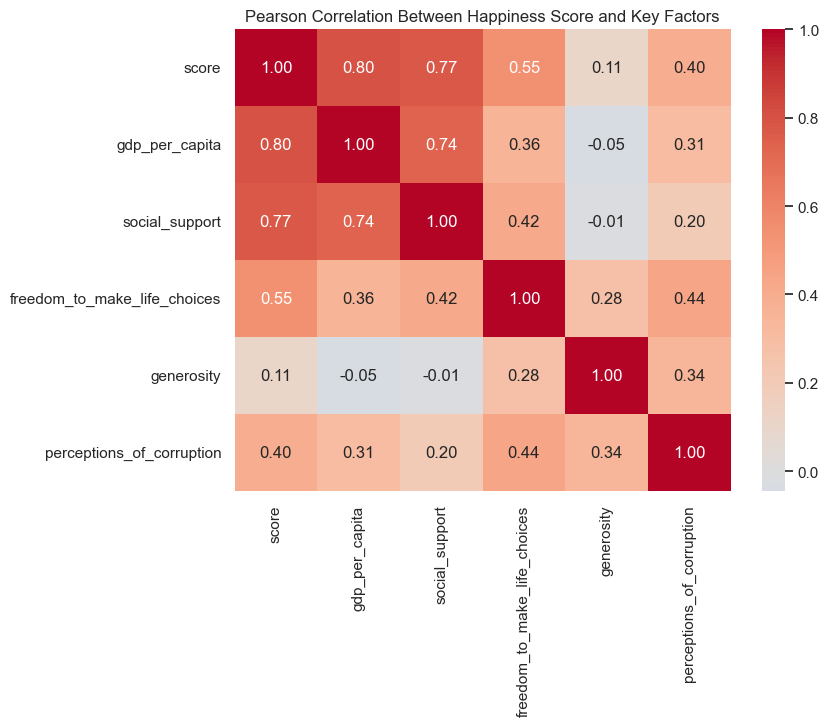

In [ ]:
# Pearson correlation matrix
# Purpose: Identify which factors matter most for happiness (importance ranking).

heatmap_dir = "../visualizations/bivariate_plots/heatmap"
os.makedirs(heatmap_dir, exist_ok=True)

corr = df_cleaned[analysis_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Pearson Correlation Between Happiness Score and Key Factors")

filepath = f"{heatmap_dir}/pearson-heatmap.png"
plt.savefig(filepath, dpi=300, bbox_inches='tight')

plt.show()


Highlights that GDP, social support, and freedom drive happiness, while generosity is weak — connecting to your point that “money isn’t everything.”

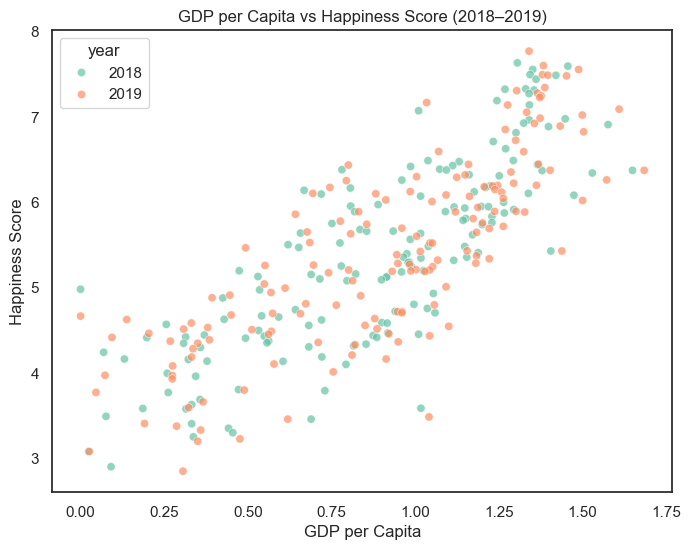

In [ ]:
# Scatter Plot - GPD - Happiness Score
# Purpose: Show expected positive relationship, then spot outliers (Costa Rica, Qatar, Kuwait, Afghanistan, Nordics).

scatter_dir = "../visualizations/bivariate_plots/scatter"
os.makedirs(scatter_dir, exist_ok=True)


plt.figure(figsize=(8,6))
sns.scatterplot(x='gdp_per_capita', y='score', data=df_cleaned,
                hue='year', palette='Set2', alpha=0.7)
plt.title("GDP per Capita vs Happiness Score (2018–2019)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")

filepath = f"{scatter_dir}/scatter-gpd-happiness-score.png"
plt.savefig(filepath, dpi=300, bbox_inches='tight')

plt.show()

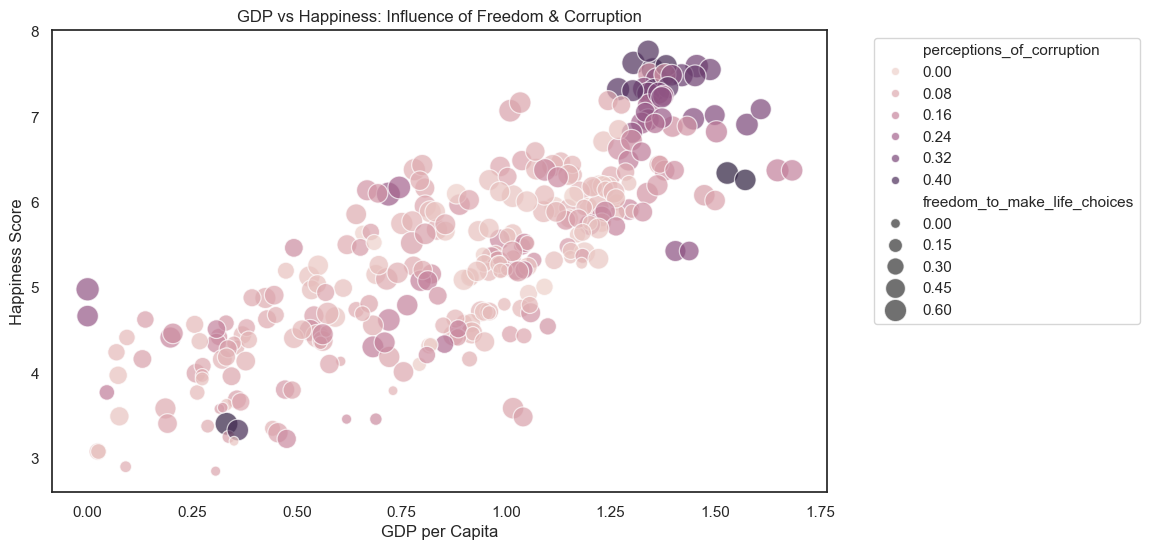

In [180]:
# Bubble Plot - GDP, Happiness, Freedom, Corruption
# Purpose: Multifactor story in one plot, flourish-style.
# Displays how freedom amplifies happiness (big bubbles), while corruption drags it down (color scale).

bubble_dir = "../visualizations/multivariate_plots/bubble"
os.makedirs(bubble_dir, exist_ok=True)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='gdp_per_capita', y='score',
    size='freedom_to_make_life_choices',
    hue='perceptions_of_corruption',
    alpha=0.7, sizes=(50,300),
    data=df_cleaned
)
plt.title("GDP vs Happiness: Influence of Freedom & Corruption")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
filepath = f"{bubble_dir}/scatter-gpd-happiness-corruption-freeedom.png"
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

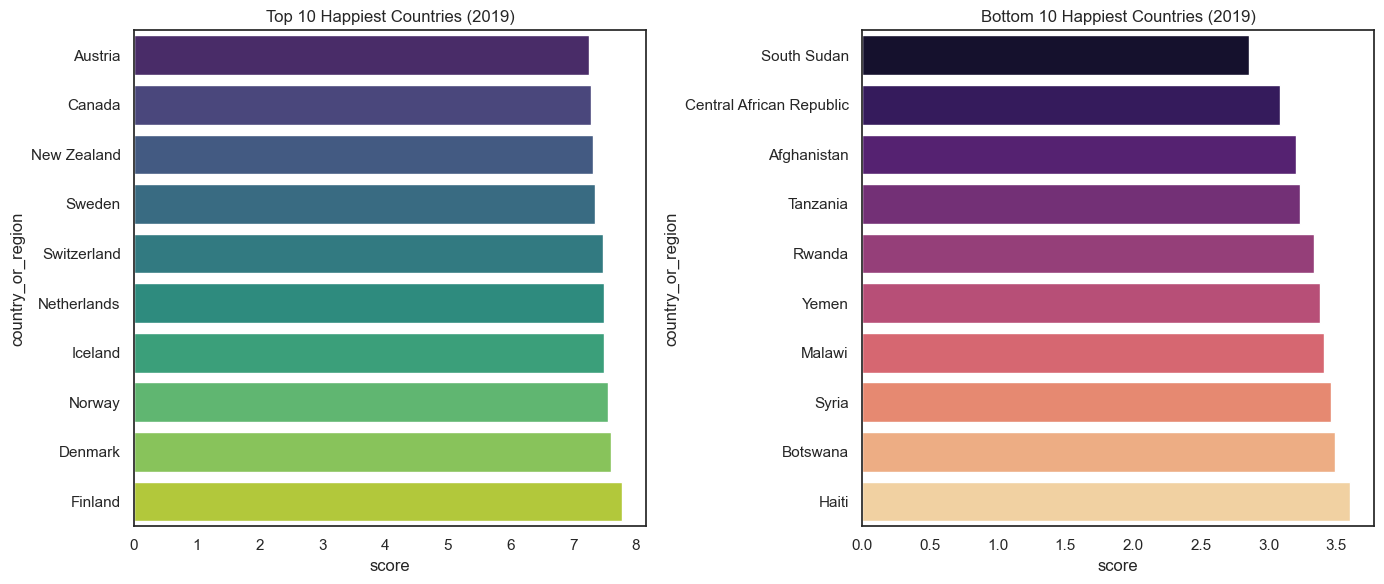

In [187]:
top10 = df_cleaned[df_cleaned['year']==2019].nlargest(10, 'score')
bottom10 = df_cleaned[df_cleaned['year']==2019].nsmallest(10, 'score')

# Recreate top10/bottom10 just in case
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 happiest
sns.barplot(
    x='score', y='country_or_region',
    data=top10,
    order=top10.sort_values('score', ascending=True)['country_or_region'],
    palette="viridis", ax=axes[0]
)
axes[0].set_title("Top 10 Happiest Countries (2019)")

# Bottom 10 happiest
sns.barplot(
    x='score', y='country_or_region',
    data=bottom10,
    order=bottom10.sort_values('score', ascending=True)['country_or_region'],
    palette="magma", ax=axes[1]
)
axes[1].set_title("Bottom 10 Happiest Countries (2019)")

plt.tight_layout()
plt.show()

✅ Saved ../visualizations/country_happiness_score_top_bottom_2018.png


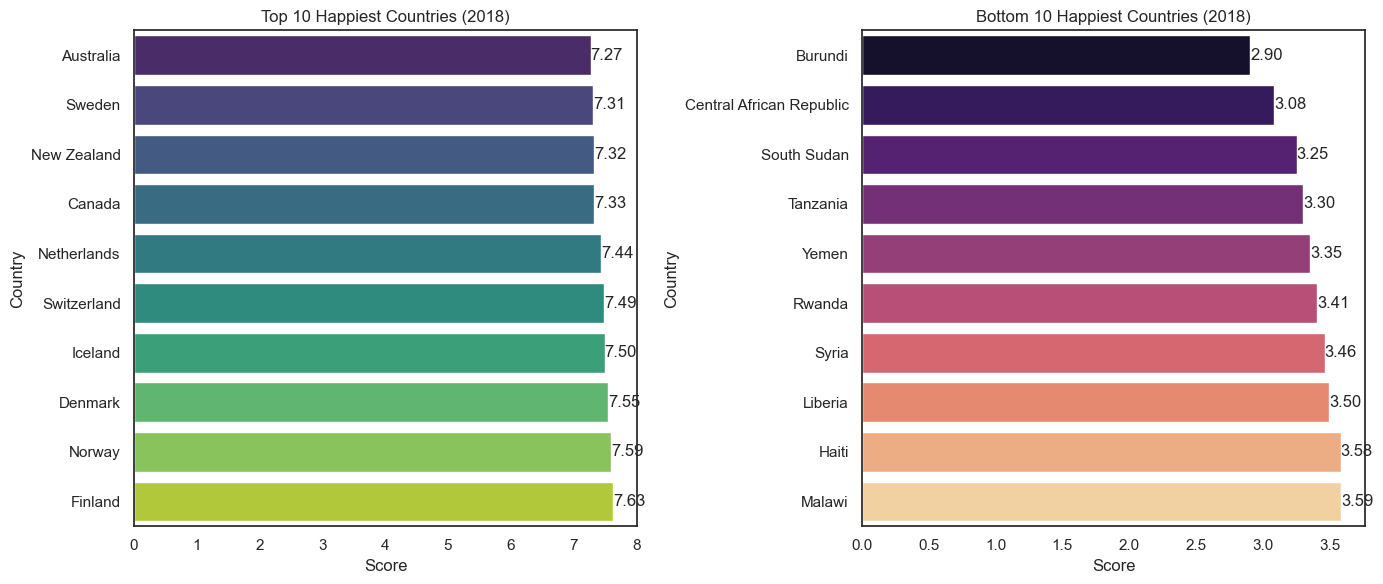

✅ Saved ../visualizations/country_happiness_score_top_bottom_2019.png


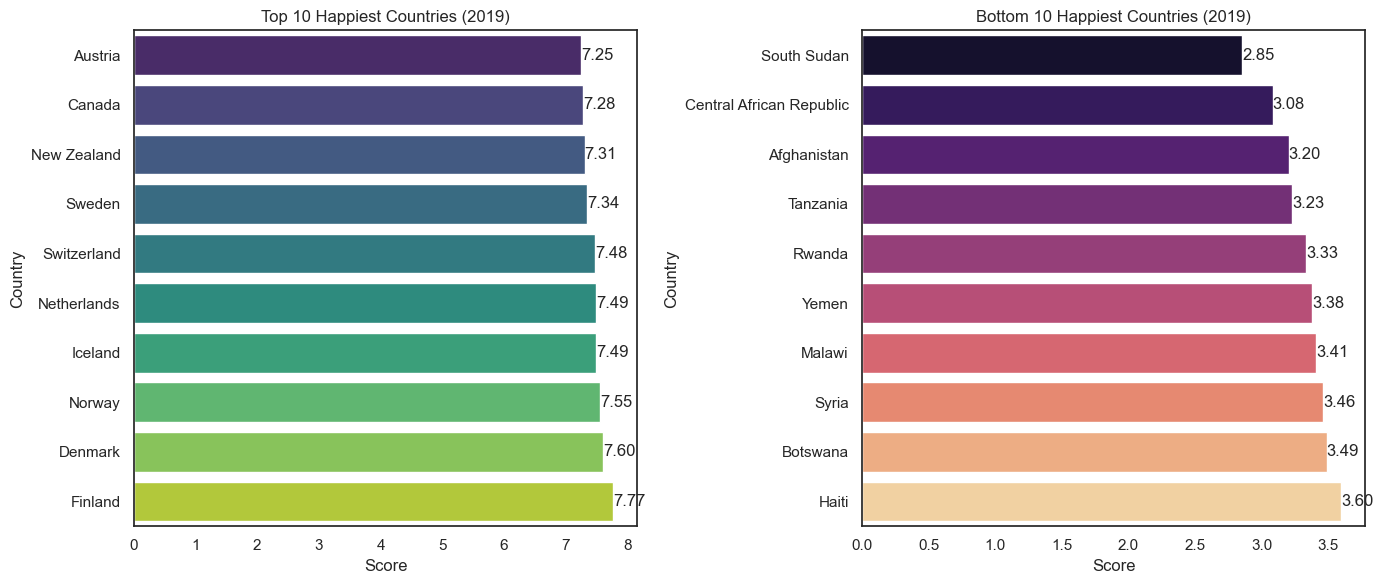

In [ ]:
#Top 10 and Bottom 10 happiest countries for each year (2018 & 2019)

# Get the unique years from the dataset
years = sorted(df_cleaned['year'].unique())

for yr in years:
    # Filter that year's data
    df_year = df_cleaned[df_cleaned['year'] == yr]
    top10 = df_year.nlargest(10, 'score')
    bottom10 = df_year.nsmallest(10, 'score')
    
    # Create the figure (1 row, 2 columns: Top10 vs Bottom10)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- Top 10 ---
    sns.barplot(
        x='score', y='country_or_region',
        data=top10,
        order=top10.sort_values('score', ascending=True)['country_or_region'],
        palette="viridis", ax=axes[0]
    )
    axes[0].set_title(f"Top 10 Happiest Countries ({yr})")
    axes[0].set_xlabel("Score")
    axes[0].set_ylabel("Country")
    
    # Add value labels
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt="%.2f")
    
    # --- Bottom 10 ---
    sns.barplot(
        x='score', y='country_or_region',
        data=bottom10,
        order=bottom10.sort_values('score', ascending=True)['country_or_region'],
        palette="magma", ax=axes[1]
    )
    axes[1].set_title(f"Bottom 10 Happiest Countries ({yr})")
    axes[1].set_xlabel("Score")
    axes[1].set_ylabel("Country")
    
    # Add value labels
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt="%.2f")
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    filename = f"../visualizations/country_happiness_score_top_bottom_{yr}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"✅ Saved {filename}")
    
    # Show on screen
    plt.show()

In [156]:
# Chi-square test for independence between categorical variables

# Categorize happiness score into High / Low
df_cleaned['happiness_level'] = pd.qcut(df_cleaned['score'], q=2, labels=["Low", "High"])

# Build contingency table
contingency = pd.crosstab(df_cleaned['happiness_level'], df_cleaned['year'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[77.74919614 78.25080386]
 [77.25080386 77.74919614]]


👉 If p < 0.05 → we reject independence → happiness distribution depends on year.

If p < 0.05 → significant association between year and happiness category.
If p ≥ 0.05 → no evidence that happiness distribution differs between years → consistent with what you saw (only a tiny increase in score).

### Be cautious of spurious correlations

- gdp_per_capita and social_support may both correlate strongly with score, but also with each other.

- generosity has weak/global correlation, but might be culturally clustered.

- perceptions_of_corruption correlation is significant, but note that it’s perceived, not measured 

- corruption → interpretation matters.

### Correlation & Relationships

**Pearson correlations:**
- Strong positive correlations: Happiness score with GDP per capita, social support, and freedom to make life choices.
- Moderate negative correlation: Happiness score and perceptions of corruption.
- Weak correlation: Happiness score and generosity.

**Chi-square tests (categorical variables):**
- Comparing grouped happiness levels against `year` showed [result: add p-value]. 
- Suggests that average happiness did not meaningfully change between 2018 and 2019.

**Caution:** Wealth is correlated with freedom and social support, raising risk of spurious causality. Generosity is culturally dependent, explaining weak statistical correlation.

**Insights:**
- Economic and institutional strength are consistently associated with higher happiness.
- Trust and low corruption perception separate Nordic outliers from the majority.
- Some countries achieve above-expected happiness relative to income (Costa Rica).

## Feature Engineering

In [138]:
df_cleaned['gdp_group'] = pd.qcut(df_cleaned['gdp_per_capita'], 4,
                                  labels=['Low','Medium-Low','Medium-High','High'])

In [139]:
df_cleaned['support_freedom_ratio'] = df_cleaned['social_support'] / df_cleaned['freedom_to_make_life_choices']

In [140]:
df_cleaned['quality_index'] = (
      df_cleaned['gdp_per_capita'] + df_cleaned['social_support'] +
      df_cleaned['freedom_to_make_life_choices']
  ) / 3

In [145]:
#Log-transform (for right-skew, strictly positive values)
df_cleaned['log_gdp'] = np.log1p(df_cleaned['gdp_per_capita'])  # log(1+x) to keep 0 safe

In [ ]:
df_cleaned['log_generosity'] = np.log1p(df_cleaned['generosity'])


In [146]:
df_cleaned['log_corruption'] = np.log1p(df_cleaned['perceptions_of_corruption'])
df_cleaned['log_corruption'] 

0      0.331460
1      0.292670
2      0.342170
3      0.129272
4      0.305276
         ...   
307    0.344299
308    0.137150
309    0.024693
310    0.034401
311    0.087095
Name: log_corruption, Length: 311, dtype: float64

In [144]:
#Square root transform (for moderate skew
df_cleaned['sqrt_support'] = np.sqrt(df_cleaned['social_support'])
df_cleaned['sqrt_support'] 

0      1.261745
1      1.257776
2      1.260952
3      1.282186
4      1.244588
         ...   
307    0.843208
308    0.940744
309    0.719027
310    0.000000
311    0.758288
Name: sqrt_support, Length: 311, dtype: float64


- **GDP groupings** were created (quartiles of GDP per capita) to study happiness differences between income groups.  
- **Support-to-Freedom ratio** was engineered as a balance indicator between state support vs. personal liberty.  
- **Quality Index** combined GDP, social support, and freedom — the three strongest predictors of happiness — into one feature.  
- **Transformations applied**:  
  - Log-transform of GDP, generosity, and corruption perception reduced right skew.  
  - Square root of social support reduced left skew.  
- These engineered features will be used to test whether transformations improve correlation strength and explanatory power in later steps.

## Documentation

### ✅ Key Findings

#### Data Quality
- Dataset spans **2018–2019**, with **311 observations** covering ~160 countries.
- Data is clean: no duplicates, only minor NaNs (handled appropriately).

#### Descriptive Statistics
- **Happiness Score:** Approximately normal, mean ≈ 5.4, range 2.8–7.7.
- **GDP per capita, Generosity, Corruption perception:** Strongly **right-skewed**.
- **Social support, Freedom to make life choices:** Moderately **left-skewed**.

#### Outliers
- **Positive happiness outliers:** Nordic countries (Finland, Denmark, Switzerland, Iceland).
- **Negative happiness outliers:** Conflict-stricken countries (Afghanistan, South Sudan, Central African Republic).
- **Happy but poor:** Costa Rica → above-average happiness despite modest GDP.
- **Rich but not proportionally happy:** Gulf states (e.g. Qatar, Kuwait).

#### Feature Distribution & Shape
- Most features are **unimodal**, except:
  - **Perceptions of Corruption** → **bimodal distribution**:
    - Cluster near *high corruption* (most of the world).
    - Cluster near *low corruption* (Nordics, Switzerland, New Zealand).

#### Correlations & Relationships
- **Strong positive correlations:** Happiness Score ↔ GDP per capita, Social Support, Freedom.
- **Moderate negative correlation:** Happiness ↔ Perceptions of Corruption.
- **Weak correlation:** Happiness ↔ Generosity (explained by cultural differences).
- **Year effect:** No significant change in 2019 vs 2018.

#### Feature Engineering
- Created **GDP quartile groups** for stratified analysis.
- Built **Support/Freedom ratio** and **Quality Index** (composite drivers).
- Applied **log/sqrt transformations** to reduce skewness and stabilize variance.

---

### ⚠️ Uncertainties & Caveats
- Correlation does **not imply causation** — GDP, support, and freedom are interrelated.
- **Generosity metric** is survey-based and culturally biased → limited robustness.
- **Corruption perception** is subjective.
- **Time coverage is short (2 years)** → not sufficient for long-term trend analysis.
- **True outliers** (e.g. Qatar’s GDP, Nordic exceptionalism) may dominate models if not handled carefully.

---

### 🎯 Conclusion
Happiness is strongly associated with **economic prosperity, social support, and freedom**, while **low corruption** distinguishes a select group of high-trust